In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle

In [13]:
df=pd.read_csv(r"C:\Users\Ramya\OneDrive\Documents\large_house_price_dataset.csv")
df

,Area,Bedrooms,Bathrooms,Floors,Parking,Age,Price
0,3674,3,1,2,1,28,22674207
1,1360,2,2,3,2,20,8910116
2,1794,1,1,2,0,29,10412863
3,1630,1,4,3,2,7,11906611
4,1595,3,4,2,0,13,10903562
...,...,...,...,...,...,...,...
4995,3300,2,2,2,2,26,20789932
4996,771,2,4,3,1,0,6675496
4997,2322,5,4,3,2,6,17099165
4998,3485,2,2,1,0,21,21569046


In [14]:
df.isnull()

,Area,Bedrooms,Bathrooms,Floors,Parking,Age,Price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [15]:
df.count()

Area         5000
Bedrooms     5000
Bathrooms    5000
Floors       5000
Parking      5000
Age          5000
Price        5000
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Area       5000 non-null   int64
 1   Bedrooms   5000 non-null   int64
 2   Bathrooms  5000 non-null   int64
 3   Floors     5000 non-null   int64
 4   Parking    5000 non-null   int64
 5   Age        5000 non-null   int64
 6   Price      5000 non-null   int64
dtypes: int64(7)
memory usage: 273.6 KB


In [17]:
df.shape

(5000, 7)

In [18]:
df.describe()

,Area,Bedrooms,Bathrooms,Floors,Parking,Age,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,2272.444600,2.985000,2.494000,2.001600,1.001000,14.422200,1.510591e+07
std,1005.817287,1.412648,1.130584,0.813222,0.812608,8.619884,6.087296e+06
min,500.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.148928e+06
25%,1413.750000,2.000000,1.000000,1.000000,0.000000,7.000000,9.938504e+06
50%,2287.000000,3.000000,3.000000,2.000000,1.000000,15.000000,1.521962e+07
75%,3145.000000,4.000000,4.000000,3.000000,2.000000,22.000000,2.033671e+07
max,3999.000000,5.000000,4.000000,3.000000,2.000000,29.000000,2.750898e+07


In [19]:
df.isnull().sum()

Area         0
Bedrooms     0
Bathrooms    0
Floors       0
Parking      0
Age          0
Price        0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
df.drop_duplicates(inplace=True)

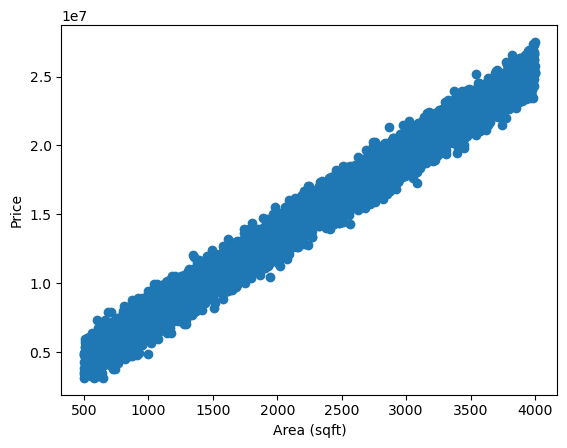

In [22]:
plt.scatter(df["Area"],df["Price"])
plt.xlabel("Area (sqft)")
plt.ylabel("Price")
plt.show()

In [23]:
X=df[["Area","Bedrooms","Bathrooms","Floors","Parking","Age"]]
Y=df["Price"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=40)

In [24]:
lr=LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [25]:
Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)

In [26]:
print("Train R2:" ,r2_score(Y_train,Y_train_pred))
print("Test R2:", r2_score(Y_test,Y_test_pred))

Train R2: 0.9977077531182202
Test R2: 0.9978129015251428


In [28]:
mae= mean_absolute_error(Y_test,Y_test_pred)
mse= mean_squared_error(Y_test,Y_test_pred)
rmse = np.sqrt(mse)
print("MAE :" ,mae)
print("MSE :" ,mse)
print("RMSE :" ,rmse)

MAE : 253503.6013011461
MSE : 85460908474.4067
RMSE : 292336.9776035982


In [29]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,Y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge R2:" , r2_score(Y_test,ridge_pred))

Ridge R2: 0.997813077851038


In [30]:
X_train.shape

(4000, 6)

In [31]:
X_test.shape

(1000, 6)

In [32]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,Y_train)
lasso_pred = ridge.predict(X_test)
print("Lasso R2:" , r2_score(Y_test,lasso_pred))

Lasso R2: 0.997813077851038


In [33]:
models = {
       "Linear": r2_score(Y_test,Y_test_pred),
       "Ridge": r2_score(Y_test,ridge_pred),
       "Lasso": r2_score(Y_test,lasso_pred),
}
models

{'Linear': 0.9978129015251428,
 'Ridge': 0.997813077851038,
 'Lasso': 0.997813077851038}

In [34]:
with open("model.pkl" , "wb")as file:
    pickle.dump(ridge, file)